In [ ]:
NAME = "Florentia de Loijer, 2010437"
COLLABORATORS = "Nick Starke, 2005453"

# Exam R
Mark Klik & Misja Mikkers

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [1]:
install.packages('gvlma', repos='http://cran.us.r-project.org')

library(tidyverse)
library(gvlma)


package 'gvlma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\eigenaar\AppData\Local\Temp\Rtmpw9EUUw\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Assignment 1


## Data

The data are given:


In [2]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

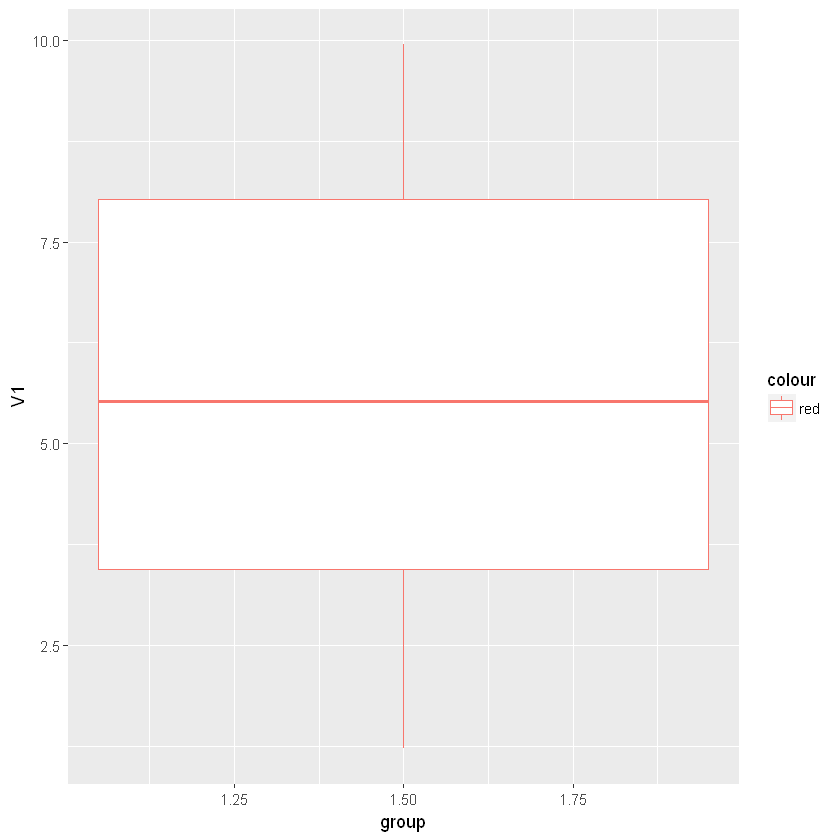

In [3]:
    #We use ggplot to plot graphs, with geom_boxplot() we specify what kind of graph this will be.
ggplot(data = df1, aes(x = group, y = V1, colour="red")) +
  geom_boxplot() 



## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [114]:
reg1 <- lm(data=df1, response~V1)

summary(reg1)



Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

In [115]:
    #We use the gvlma function to check the linear regression that we determined above.
gvlma(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Coefficients:
(Intercept)           V1  
      2.630       -1.915  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                      Value p-value                Decision
Global Stat        0.654319  0.9568 Assumptions acceptable.
Skewness           0.002398  0.9609 Assumptions acceptable.
Kurtosis           0.007200  0.9324 Assumptions acceptable.
Link Function      0.005852  0.9390 Assumptions acceptable.
Heteroscedasticity 0.638869  0.4241 Assumptions acceptable.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



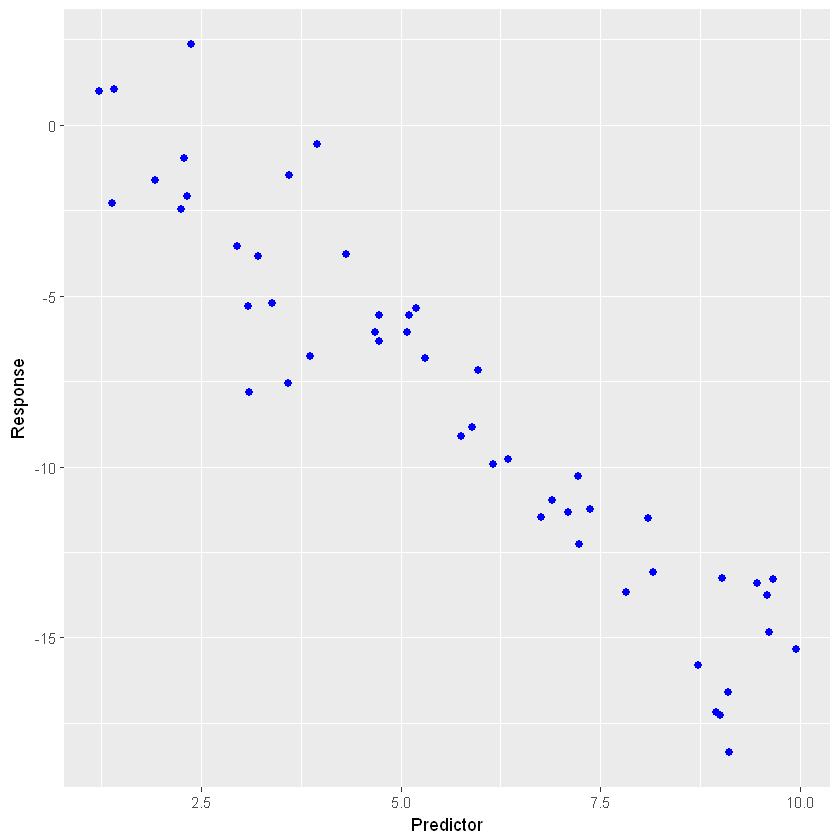

In [130]:
    #Once again we use ggplot, and now we specify the graph with geom_point().
ggplot(df1, aes(x = V1, y = response), abline(lm(response~V1))) +
  geom_point(shape=16, size=2, colour="blue")+
xlab("Predictor")+
ylab("Response")





# Assigment 2

# Packages

In [7]:
install.packages(c("maptools","rgdal","rgeos"))
install.packages("../Package//thematicmaps_2.1.tar.gz", repos=NULL, type = "source")
library(thematicmaps)
library(tidyverse)

package 'maptools' successfully unpacked and MD5 sums checked
package 'rgdal' successfully unpacked and MD5 sums checked
package 'rgeos' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\eigenaar\AppData\Local\Temp\Rtmpw9EUUw\downloaded_packages


Loading required package: maptools
Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.4.4"Checking rgeos availability: TRUE
Loading required package: digest
Loading required package: rgdal
rgdal: version: 1.2-8, (SVN revision 663)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.0.1, released 2015/09/15
 Path to GDAL shared files: C:/Users/eigenaar/Anaconda3/Lib/R/library/rgdal/gdal
 Loaded PROJ.4 runtime: Rel. 4.9.2, 08 September 2015, [PJ_VERSION: 492]
 Path to PROJ.4 shared files: C:/Users/eigenaar/Anaconda3/Lib/R/library/rgdal/proj
 Linking to sp version: 1.2-5 
Loading required package: rgeos
rgeos version: 0.3-23, (SVN revision 546)
 GEOS runtime version: 3.5.0-CAPI-1.9.0 r4084 
 Linking to sp version: 1.2-5 
 Polygon checking: TRUE 

Loading required package: grid


## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [9]:
    #We use a downloaded package (Located in the Package map) which we read with the function read.csv2.
map_municipal <- read.csv2("../Package/nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

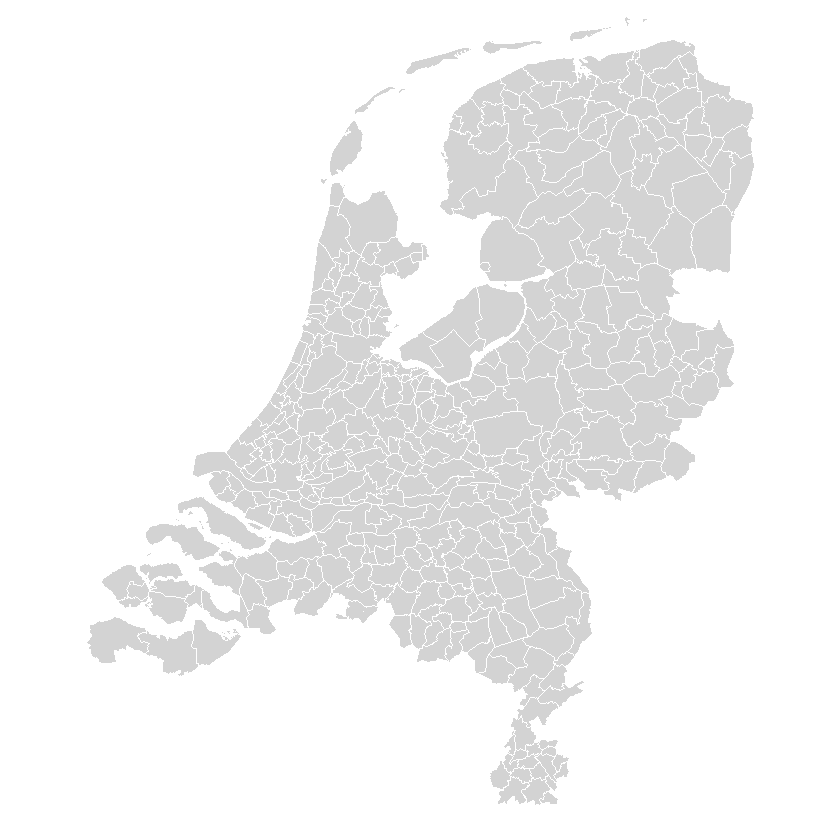

In [10]:
    #We use the thematicmaps for this.

AddMapLayer(MapPlot(), map_municipal)


## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [11]:
    #We again use read.csv2 to read the file located in Package.
pc4_locations <- read.csv2("../Package/nld_pc4_locations.csv")%>%
  mutate(X = as.numeric(as.character(X))) %>%
   mutate(Y = as.numeric(as.character(Y)))

str(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


## Assignment 2d

### 2di

Read in the school data


In [90]:
    #Again we use read.csv2 to read a downloaded package (located in the map Code).
schools <- read.csv2("../Package/schools.csv")
names(schools)

head(schools)


[1] "PROVINCIE"                                 
 [2] "BEVOEGD.GEZAG.NUMMER"                      
 [3] "BRIN.NUMMER"                               
 [4] "VESTIGINGSNUMMER"                          
 [5] "VESTIGINGSNAAM"                            
 [6] "STRAATNAAM"                                
 [7] "HUISNUMMER.TOEVOEGING"                     
 [8] "POSTCODE"                                  
 [9] "PLAATSNAAM"                                
[10] "GEMEENTENUMMER"                            
[11] "GEMEENTENAAM"                              
[12] "DENOMINATIE"                               
[13] "TELEFOONNUMMER"                            
[14] "INTERNETADRES"                             
[15] "ONDERWIJSSTRUCTUUR"                        
[16] "STRAATNAAM.CORRESPONDENTIEADRES"           
[17] "HUISNUMMER.TOEVOEGING.CORRESPONDENTIEADRES"
[18] "POSTCODE.CORRESPONDENTIEADRES"             
[19] "PLAATSNAAM.CORRESPONDENTIEADRES"           
[20] "NODAAL.GEBIED.CODE"                        
[21] "NODAAL.GEBIED.NAAM"                        
[22] "RPA.GEBIED.CODE"                           
[23] "RPA.GEBIED.NAAM"                           
[24] "WGR.GEBIED.CODE"                           
[25] "WGR.GEBIED.NAAM"                           
[26] "COROPGEBIED.CODE"                          
[27] "COROPGEBIED.NAAM"                          
[28] "ONDERWIJSGEBIED.CODE"                      
[29] "ONDERWIJSGEBIED.NAAM"                      
[30] "RMC.REGIO.CODE"                            
[31] "RMC.REGIO.NAAM"

PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,POSTCODE,PLAATSNAAM,GEMEENTENUMMER,...,RPA.GEBIED.CODE,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM
,41152,23HC,23HC04,RSG Lingecollege,,,,,NA,...,NA,,NA,,NA,,NA,,NA,
Drenthe,10053,18BR,18BR00,School voor Praktijkonderwijs Assen,Zwartwatersweg,202,9406 NN,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,10053,18BR,18BR01,School voor Praktijkonderwijs Assen,Bosrand,2,9401 SL,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO00,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Mr Groen v Prinstererln,98,9402 KG,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO01,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Schoolstraat,1,9331 AV,NORG,1699,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,1,Groningen en omstreken,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO02,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Esdoornlaan,2,9411 AV,BEILEN,1731,...,5,Zuid- en Midden-Drenthe,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe


### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [113]:
    #

POSTCODE <- schools1["POSTCODE"]

schools1 <- schools %>%
    mutate(POSTCODE=substr(POSTCODE, 1, 4))
PC4 <- POSTCODE


PC4


POSTCODE
""
9406
9401
9402
9331
9411
9461
9402
9402
9403


### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [110]:
    #We use full_join to join these two dataframes together, and group by PC4, to see the locations that match both data frames.
school_loc <- full_join(pc4_locations, schools1, by="PC4")




ERROR: Error: `by` can't contain join column `PC4` which is missing from RHS


## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


In [ ]:
     #


End of notebook